# **순환 신경망(Recurrent Neural Network, RNN)**

부교재: 모두의 딥러닝
* https://thebook.io/080324/part05/ch18/
* https://wikidocs.net/22933



* 순환 신경망은 여러 개의 데이터가 순서대로 입력되었을 때, 앞에서 입력받은 데이터를 **잠시 기억**해 놓는 방법. 
* 기억된 데이터가 얼마나 중요한지 판단하고 별도의 **가중치를 주어 다음 데이터**로 넘김
* 모든 입력 값에 이 작업을 순서대로 실행하므로 다음 층으로 넘어가기 전에 같은 층을 맴도는 것처럼 보임
* 이렇게 같은 층 안에서 맴도는 성질 때문에 순환 신경망(이하 RNN)이라고 함

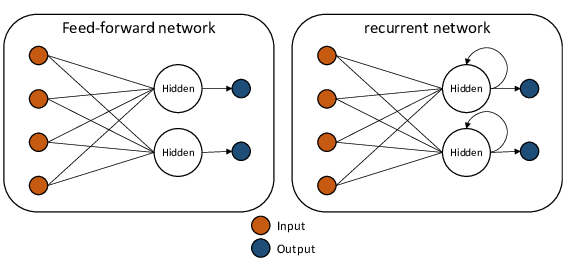

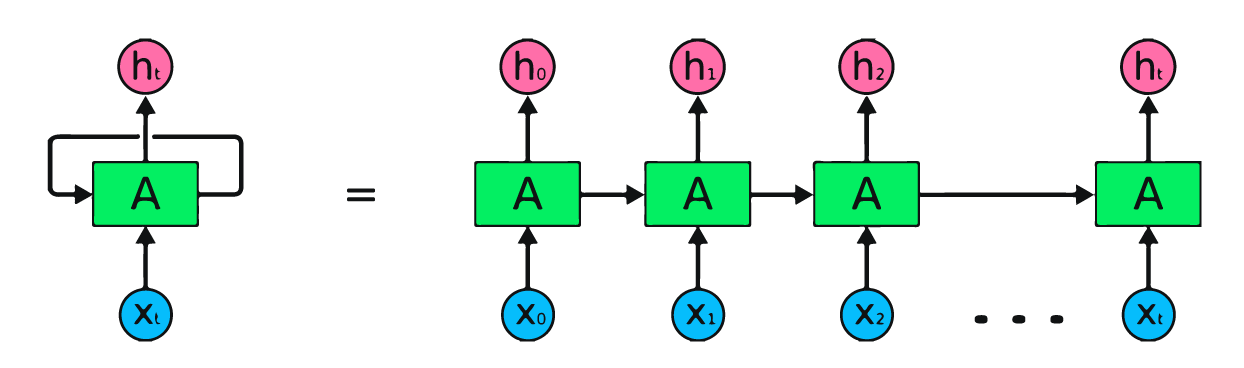

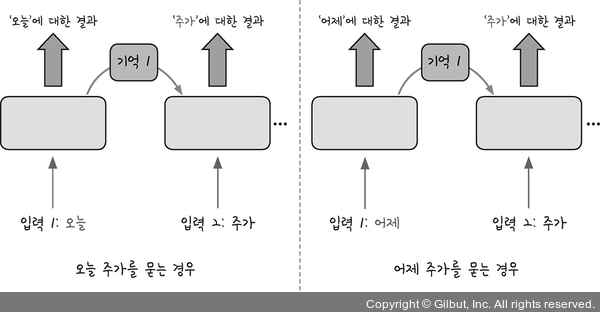

### **LSTM(Long Short-Term Memory)**

* **LSTM**은 한 층 안에서 반복을 많이 해야 하는 RNN의 특성상 일반 신경망보다 기울기 소실 문제가 더 많이 발생하고 이를 해결하기 어렵다는 단점을 보완한 방법
* 즉, 반복되기 직전에 다음 층으로 기억된 값을 넘길지 여부를 관리하는 단계를 하나 더 추가하는 것임

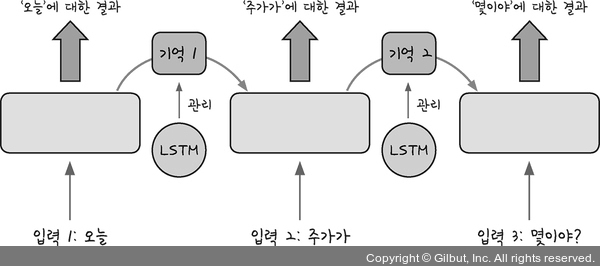

### RNN 적용 방식

RNN 방식의 장점은 입력 값과 출력 값을 어떻게 설정하느냐에 따라 여러 가지 상황에서 이를 적용할 수 있음

* 단일 입력 다수 출력(one-to-many): 사진의 캡션을 만들 때 활용
* 다수 입력 단일 출력(many-to-one): 문장을 읽고 뜻을 파악할 때 활용
* 다수 입력 다수 출력(many-to-many): 문장을 번역할 때 활용

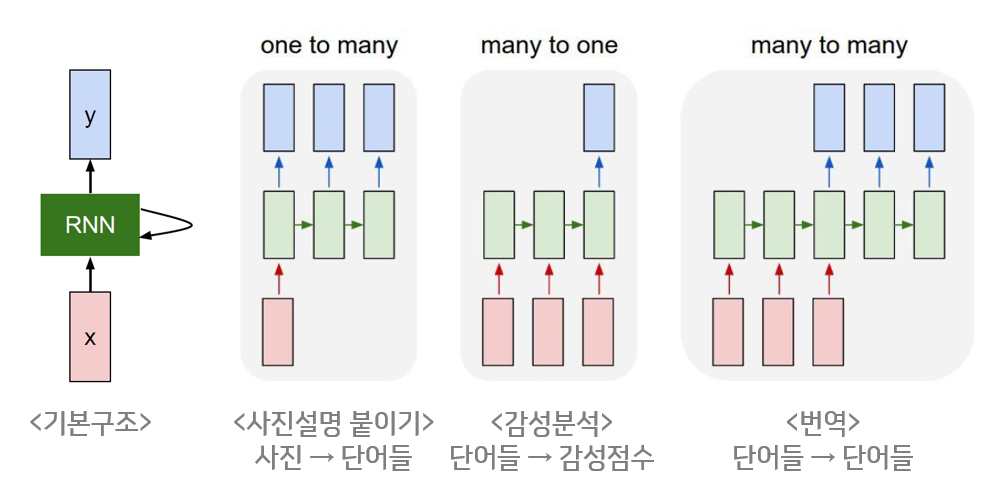

### **LSTM을 이용한 로이터 뉴스 카테고리 분류하기**

* 케라스에서 제공하는 로이터 뉴스 데이터를 LSTM을 이용하여 텍스트 분류. 
* 로이터 뉴스 기사 데이터는 총 11,228개의 뉴스 기사가 46개의 뉴스 카테고리로 분류되는 뉴스 기사 데이터

* 텍스트를 토큰(Tokenization)의 단위로 분할하는 작업

In [79]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Embedding
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing import sequence
from tensorflow.keras.datasets import reuters 
from tensorflow.keras.callbacks import EarlyStopping

import numpy as np
import matplotlib.pyplot as plt

(X_train, y_train), (X_test, y_test) = reuters.load_data(num_words=1000, test_split=0.2)

category = np.max(y_train) + 1
print(category, '카테고리')
print(len(X_train), '학습용 뉴스 기사')
print(len(X_test), '테스트용 뉴스 기사')

46 카테고리
8982 학습용 뉴스 기사
2246 테스트용 뉴스 기사


In [65]:
np.max(X_train[0])

4579

In [78]:
data = reuters.get_word_index()
len(data)

30979

In [80]:
print('첫번째 훈련용 뉴스 기사 :', X_train[0])
print('첫번째 훈련용 뉴스 기사의 레이블 :',y_train[0])

첫번째 훈련용 뉴스 기사 : [1, 2, 2, 8, 43, 10, 447, 5, 25, 207, 270, 5, 2, 111, 16, 369, 186, 90, 67, 7, 89, 5, 19, 102, 6, 19, 124, 15, 90, 67, 84, 22, 482, 26, 7, 48, 4, 49, 8, 864, 39, 209, 154, 6, 151, 6, 83, 11, 15, 22, 155, 11, 15, 7, 48, 9, 2, 2, 504, 6, 258, 6, 272, 11, 15, 22, 134, 44, 11, 15, 16, 8, 197, 2, 90, 67, 52, 29, 209, 30, 32, 132, 6, 109, 15, 17, 12]
첫번째 훈련용 뉴스 기사의 레이블 : 3


* 데이터 안에서 해당 단어가 몇 번이나 나타나는지 세어 빈도에 따라 번호를 붙였임
* 예를 들어, 2이라고 하면 두 번째로 빈도가 높은 단어라는 의미함
* 이 작업을 위해 tokenizer() 같은 함수를 사용하는데, 케라스에서 제공하는 데이터는 이 작업을 이미 마친 상태임

**데이터 전처리**

In [8]:
# 단어의 수를 맞춤 
X_train = sequence.pad_sequences(X_train, maxlen=100)
X_test = sequence.pad_sequences(X_test, maxlen=100)

# 원-핫 인코딩 처리
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

* 주의해야 할 점은 각 기사의 단어 수가 제각각 다르므로 이를 동일하게 맞추어야 함
* 이때는 다음과 같이 **데이터 전처리 함수 sequence()**를 이용함
* **maxlen=100: 단어 수를 100개로 맞추라는 의미**
* 입력된 기사의 단어 수가 100보다 크면 100개째 단어만 선택하고 나머지는 버리고, 100보다 작을 경우 모두 0으로 채움

**모델의 구조 설정**

In [9]:
model = Sequential()
model.add(Embedding(input_dim=1000,output_dim=32,input_length=100))
model.add(LSTM(units=100, activation='tanh'))
model.add(Dense(units=46, activation='softmax'))

* Embedding 층과 LSTM 층을 새로 추가
* Embedding 층은 데이터 전처리 과정을 통해 **입력된 값을 받아 다음 층이 알 수 있는 형태로 변환하는 역할**을 수행
* **Embedding(input_dim=10000,output_dim=32,input_length=100)** 형식으로 사용하며, 모델 설정 부분의 맨 처음에 있어야 함

* LSTM은 앞서 설명했듯이 RNN에서 기억 값에 대한 가중치를 제어
* **LSTM(기사당 단어 수, 기타 옵션)** 형식으로 적용
* **LSTM의 활성화 함수로는 tanh을 사용**

In [10]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
early_stopping_callback = EarlyStopping(monitor='val_loss', patience=10)

history = model.fit(X_train, y_train, batch_size=20, epochs=200, validation_data=(X_test, y_test), callbacks=[early_stopping_callback])

Epoch 1/200
450/450 [==============================] - 11s 9ms/step - loss: 2.2818 - accuracy: 0.4213 - val_loss: 2.0210 - val_accuracy: 0.5120
Epoch 2/200
450/450 [==============================] - 3s 8ms/step - loss: 2.0111 - accuracy: 0.5027 - val_loss: 1.9642 - val_accuracy: 0.5183
Epoch 3/200
450/450 [==============================] - 3s 8ms/step - loss: 1.8815 - accuracy: 0.5257 - val_loss: 1.8176 - val_accuracy: 0.5365
Epoch 4/200
450/450 [==============================] - 4s 8ms/step - loss: 1.7115 - accuracy: 0.5627 - val_loss: 1.6874 - val_accuracy: 0.5735
Epoch 5/200
450/450 [==============================] - 4s 8ms/step - loss: 1.6517 - accuracy: 0.5778 - val_loss: 1.6619 - val_accuracy: 0.5784
Epoch 6/200
450/450 [==============================] - 3s 7ms/step - loss: 1.5819 - accuracy: 0.5911 - val_loss: 1.6078 - val_accuracy: 0.5926
Epoch 7/200
450/450 [==============================] - 3s 7ms/step - loss: 1.5026 - accuracy: 0.6038 - val_loss: 1.5282 - val_accuracy: 0.594

In [11]:
model.evaluate(X_test, y_test)[0]

71/71 [==============================] - 0s 5ms/step - loss: 1.3686 - accuracy: 0.7110


1.368633508682251

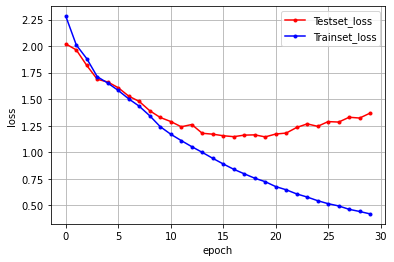

In [12]:
# 학습셋과 테스트셋의 오차 저장 
y_vloss = history.history['val_loss']
y_loss = history.history['loss']

# 그래프 표현
x_len = np.arange(len(y_loss))
plt.plot(x_len, y_vloss, marker='.', c="red", label='Testset_loss')
plt.plot(x_len, y_loss, marker='.', c="blue", label='Trainset_loss')

plt.legend(loc='upper right')
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

### **LSTM과 CNN의 조합을 이용한 영화 리뷰 분류하기**

* **인터넷 영화 데이터베이스(Internet Movie DataBase, IMDB)**는 영화와 관련된 정보와 출연진 정보, 개봉 정보, 영화 후기, 평점까지 매우 폭넓은 데이터가 저장된 자료임
* 영화에 관해 남긴 2만 5,000여 개의 영화 리뷰가 담겨 있으며, 해당 영화를 긍정적으로 평가했는지 혹은 부정적으로 평가했는지도 담겨 있음
* 각 단어에 대한 전처리를 마친 상태

In [13]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Embedding, LSTM, Conv1D, MaxPooling1D
from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing import sequence
from tensorflow.keras.callbacks import EarlyStopping

import numpy as np
import matplotlib.pyplot as plt

# 데이터를 불러와 학습셋, 테스트셋으로 나눔
(X_train, y_train), (X_test, y_test) = imdb.load_data(num_words=5000)

17464789/17464789 [==============================] - 0s 0us/step


In [14]:
# 데이터 전처리: 단어의 수를 맞춤
X_train = sequence.pad_sequences(X_train, maxlen=500)
X_test = sequence.pad_sequences(X_test, maxlen=500)

In [15]:
# 모델의 구조 설정
CNN_LSTM_model = Sequential()
CNN_LSTM_model.add(Embedding(5000, 500))
CNN_LSTM_model.add(Dropout(0.5))
CNN_LSTM_model.add(Conv1D(64, 3, padding='valid', activation='relu',strides=1))
CNN_LSTM_model.add(MaxPooling1D(pool_size=4))
CNN_LSTM_model.add(LSTM(50, activation='tanh'))
CNN_LSTM_model.add(Dense(1))
CNN_LSTM_model.add(Activation('sigmoid'))
CNN_LSTM_model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, None, 500)         2500000   
                                                                 
 dropout (Dropout)           (None, None, 500)         0         
                                                                 
 conv1d (Conv1D)             (None, None, 64)          96064     
                                                                 
 max_pooling1d (MaxPooling1D  (None, None, 64)         0         
 )                                                               
                                                                 
 lstm_2 (LSTM)               (None, 50)                23000     
                                                                 
 dense_2 (Dense)             (None, 1)                 51        
                                                      

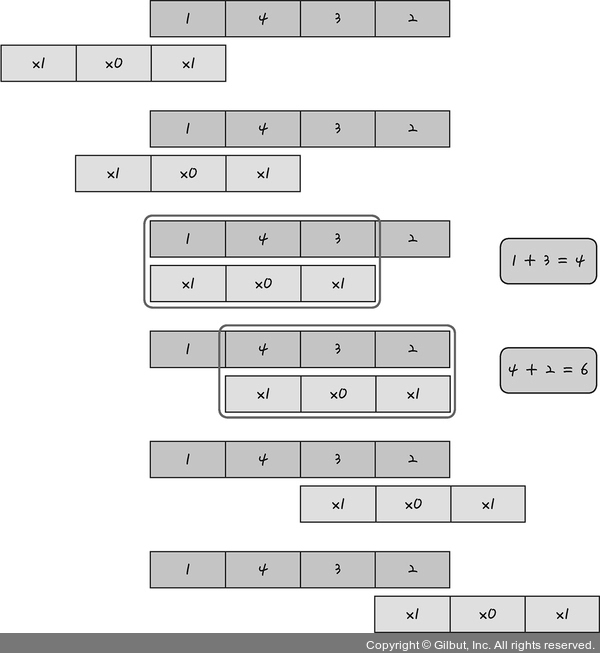

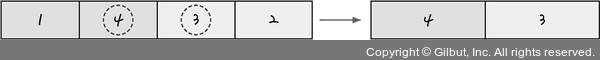

In [16]:
CNN_LSTM_model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
early_stopping_callback = EarlyStopping(monitor='val_loss', patience=5)

history = CNN_LSTM_model.fit(X_train, y_train, batch_size=40, epochs=100, validation_split=0.25, callbacks=[early_stopping_callback])

Epoch 1/100
469/469 [==============================] - 14s 19ms/step - loss: 0.3936 - accuracy: 0.8180 - val_loss: 0.2869 - val_accuracy: 0.8789
Epoch 2/100
469/469 [==============================] - 8s 17ms/step - loss: 0.2280 - accuracy: 0.9123 - val_loss: 0.2890 - val_accuracy: 0.8805
Epoch 3/100
469/469 [==============================] - 8s 17ms/step - loss: 0.1642 - accuracy: 0.9401 - val_loss: 0.3047 - val_accuracy: 0.8773
Epoch 4/100
469/469 [==============================] - 8s 17ms/step - loss: 0.1250 - accuracy: 0.9562 - val_loss: 0.3538 - val_accuracy: 0.8741
Epoch 5/100
469/469 [==============================] - 8s 17ms/step - loss: 0.0896 - accuracy: 0.9692 - val_loss: 0.3949 - val_accuracy: 0.8722
Epoch 6/100
469/469 [==============================] - 8s 17ms/step - loss: 0.0675 - accuracy: 0.9773 - val_loss: 0.4591 - val_accuracy: 0.8654


In [17]:
CNN_LSTM_model.evaluate(X_test, y_test)

782/782 [==============================] - 4s 5ms/step - loss: 0.4721 - accuracy: 0.8621


[0.47211992740631104, 0.8621199727058411]

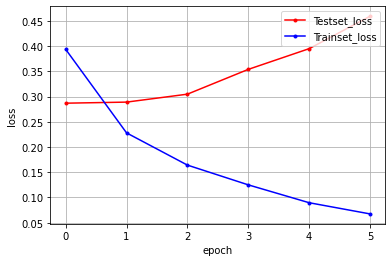

In [18]:
# 학습셋과 테스트셋의 오차 저장
y_vloss = history.history['val_loss']
y_loss = history.history['loss']

# 그래프 표현
x_len = np.arange(len(y_loss))
plt.plot(x_len, y_vloss, marker='.', c="red", label='Testset_loss')
plt.plot(x_len, y_loss, marker='.', c="blue", label='Trainset_loss')

plt.legend(loc='upper right')
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()